**Neccessary Package Installations**

In [2]:
#pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
import matplotlib.pyplot as plt

In [4]:
pd.options.display.float_format = '{:,.2f}'.format
InteractiveShell.ast_node_interactivity = "all"

### Datasets

Source: 

Dataset 1: https://figshare.com/articles/dataset/Pressure-sensitive_keystroke_dynamics_data/5170705

Dataset 2: https://www.cs.cmu.edu/~keystroke/

In [5]:
#Dataset 1
KSPEntry=pd.read_csv('KSP-Entry.csv')
KSPKeyPress=pd.read_csv('KSP-KeyPress.csv')
KSPPressure=pd.read_csv('KSP-Pressure.csv')
#Dataset 2
CMUData=pd.read_csv('DSL-StrongPasswordData.csv')

#### Processing Dataset 1

In [6]:
KSPEntry.head()

,entry_id,user,word_id
0,1265691729,76939bcf1ff4e987575d946bfd0831,2
1,1265691732,76939bcf1ff4e987575d946bfd0831,1
2,1265691735,76939bcf1ff4e987575d946bfd0831,1
3,1265691738,76939bcf1ff4e987575d946bfd0831,1
4,1265691740,76939bcf1ff4e987575d946bfd0831,0


In [7]:
KSPKeyPress.head()

,entry_id,start,stop,key_char
0,1265691729,0,45,p
1,1265691729,106,181,r
2,1265691729,317,377,7
3,1265691729,723,783,q
4,1265691729,874,960,1


In [8]:
KSPPressure.head()

,entry_id,start,sequence,pressure
0,1265691729,0,0,81
1,1265691729,0,1,80
2,1265691729,0,2,77
3,1265691729,0,3,71
4,1265691729,106,0,82


In [ ]:
CMUData.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.15,0.40,0.25,0.11,0.17,0.06,0.12,...,0.13,0.15,0.01,0.09,0.35,0.26,0.13,0.35,0.22,0.07
1,s002,1,2,0.11,0.35,0.23,0.07,0.13,0.06,0.09,...,0.14,0.26,0.11,0.11,0.26,0.15,0.08,0.28,0.19,0.07
2,s002,1,3,0.13,0.21,0.07,0.07,0.13,0.06,0.08,...,0.16,0.23,0.07,0.12,0.27,0.15,0.11,0.28,0.18,0.09
3,s002,1,4,0.13,0.25,0.12,0.11,0.25,0.14,0.10,...,0.15,0.16,0.02,0.09,0.23,0.15,0.08,0.32,0.24,0.08
4,s002,1,5,0.12,0.23,0.11,0.09,0.17,0.08,0.09,...,0.13,0.16,0.03,0.09,0.25,0.16,0.09,0.25,0.16,0.08


In [9]:
KSPPressure = KSPPressure[['entry_id','pressure']]
KSPPressure.head()

,entry_id,pressure
0,1265691729,81
1,1265691729,80
2,1265691729,77
3,1265691729,71
4,1265691729,82


In [10]:
KSPPressure = KSPPressure.groupby('entry_id').mean()

In [11]:
entry_press_merge = pd.merge(KSPEntry, KSPPressure, how='inner',left_on='entry_id', right_on = 'entry_id')
entry_press_merge.head(5)

,entry_id,user,word_id,pressure
0,1265691729,76939bcf1ff4e987575d946bfd0831,2,77.85
1,1265691732,76939bcf1ff4e987575d946bfd0831,1,76.12
2,1265691735,76939bcf1ff4e987575d946bfd0831,1,75.38
3,1265691738,76939bcf1ff4e987575d946bfd0831,1,77.97
4,1265691740,76939bcf1ff4e987575d946bfd0831,0,76.72


In [13]:
merged_df = pd.merge(entry_press_merge, KSPKeyPress, how='inner',left_on='entry_id', right_on = 'entry_id')
merged_df['key_press_diff']=merged_df['stop']-merged_df['start']
merged_df.drop(columns=['entry_id','start','stop','key_char'],inplace = True)
merged_df.head(5)
merged_df['user']=merged_df['user'].astype(str)

,user,word_id,pressure,key_press_diff
0,76939bcf1ff4e987575d946bfd0831,2,77.85,45
1,76939bcf1ff4e987575d946bfd0831,2,77.85,75
2,76939bcf1ff4e987575d946bfd0831,2,77.85,60
3,76939bcf1ff4e987575d946bfd0831,2,77.85,60
4,76939bcf1ff4e987575d946bfd0831,2,77.85,86


### Classification

#### Creating objects of Classfiers

In [14]:
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
hgb_model = HistGradientBoostingClassifier()

#### Classification on Dataset 1

In [15]:
X_train, X_test, y_train, y_test = train_test_split(merged_df.drop(columns = ['user']), merged_df['user'], test_size=0.2, random_state=14)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

18928
4732
18928
4732


##### Random Forest Classifier (Dataset 1)

In [16]:
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict_proba(X_test)

RandomForestClassifier()

In [29]:
rf_output = pd.DataFrame(rf_model.predict(X_test), index = X_test.index, columns = ['pred_user'])
rf_output = rf_output.merge(y_test, left_index = True, right_index = True)
rf_output.head()
print('Accuracy Score: ',rf_model.score(X_test, y_test))

,pred_user,user
1546,76939bcf1ff4e987575d946bfd0831,76939bcf1ff4e987575d946bfd0831
17123,edf9e8a51782e68f028343a71252c0,78583e5c41125582e7c04e753ecbde
21196,2e2f2dbbf3a3e15ca8b48a452abeae,2e2f2dbbf3a3e15ca8b48a452abeae
13708,a40023f63d25c7a1dd06f143ba2910,02079a56a96f2510c8563e36902f46
1807,5e2d439f4d87f1e2f8eb9b518a7e54,6cee6facc356652afecdea539776b2


Accuracy Score:  0.5583262890955198


##### Gradient Boost Classifier (Dataset 1)

In [19]:
gb_model.fit(X_train, y_train) 
gb_pred = gb_model.predict_proba(X_test)

GradientBoostingClassifier()

In [26]:
gb_output = pd.DataFrame(gb_model.predict(X_test), index = X_test.index, columns = ['pred_user'])
gb_output = gb_output.merge(y_test, left_index = True, right_index = True)
gb_output.head()
print('Accuracy Score: ',gb_model.score(X_test, y_test))

,pred_user,user
1546,1287a59f32c00fb05cd7014a9bcb65,76939bcf1ff4e987575d946bfd0831
17123,f9af6adf56e20512aae2e080a66267,78583e5c41125582e7c04e753ecbde
21196,f93800164dee8ada5b1c692963edc5,2e2f2dbbf3a3e15ca8b48a452abeae
13708,b3aa5c1ac0d556092b8405d2d4221d,02079a56a96f2510c8563e36902f46
1807,edf9e8a51782e68f028343a71252c0,6cee6facc356652afecdea539776b2


Accuracy Score:  0.016483516483516484


##### Histogram Gradient Boosting Classifier (Dataset 1)

In [21]:
hgb_model.fit(X_train, y_train) 
hgb_pred = hgb_model.predict_proba(X_test)

HistGradientBoostingClassifier()

In [28]:
hgb_output = pd.DataFrame(hgb_model.predict(X_test), index = X_test.index, columns = ['pred_user'])
hgb_output = hgb_output.merge(y_test, left_index = True, right_index = True)
hgb_output.head()
print('Accuracy Score: ',hgb_model.score(X_test, y_test))

,pred_user,user
1546,76939bcf1ff4e987575d946bfd0831,76939bcf1ff4e987575d946bfd0831
17123,10a6507e8d4da45c47ca12355d2ae3,78583e5c41125582e7c04e753ecbde
21196,85d019166e39ad9760eb70dc32b703,2e2f2dbbf3a3e15ca8b48a452abeae
13708,a40023f63d25c7a1dd06f143ba2910,02079a56a96f2510c8563e36902f46
1807,76939bcf1ff4e987575d946bfd0831,6cee6facc356652afecdea539776b2


Accuracy Score:  0.2677514792899408


##### ROC Curves of 3 Classifiers for Dataset 1:

**Random Forest Classifer ROC Curve**

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

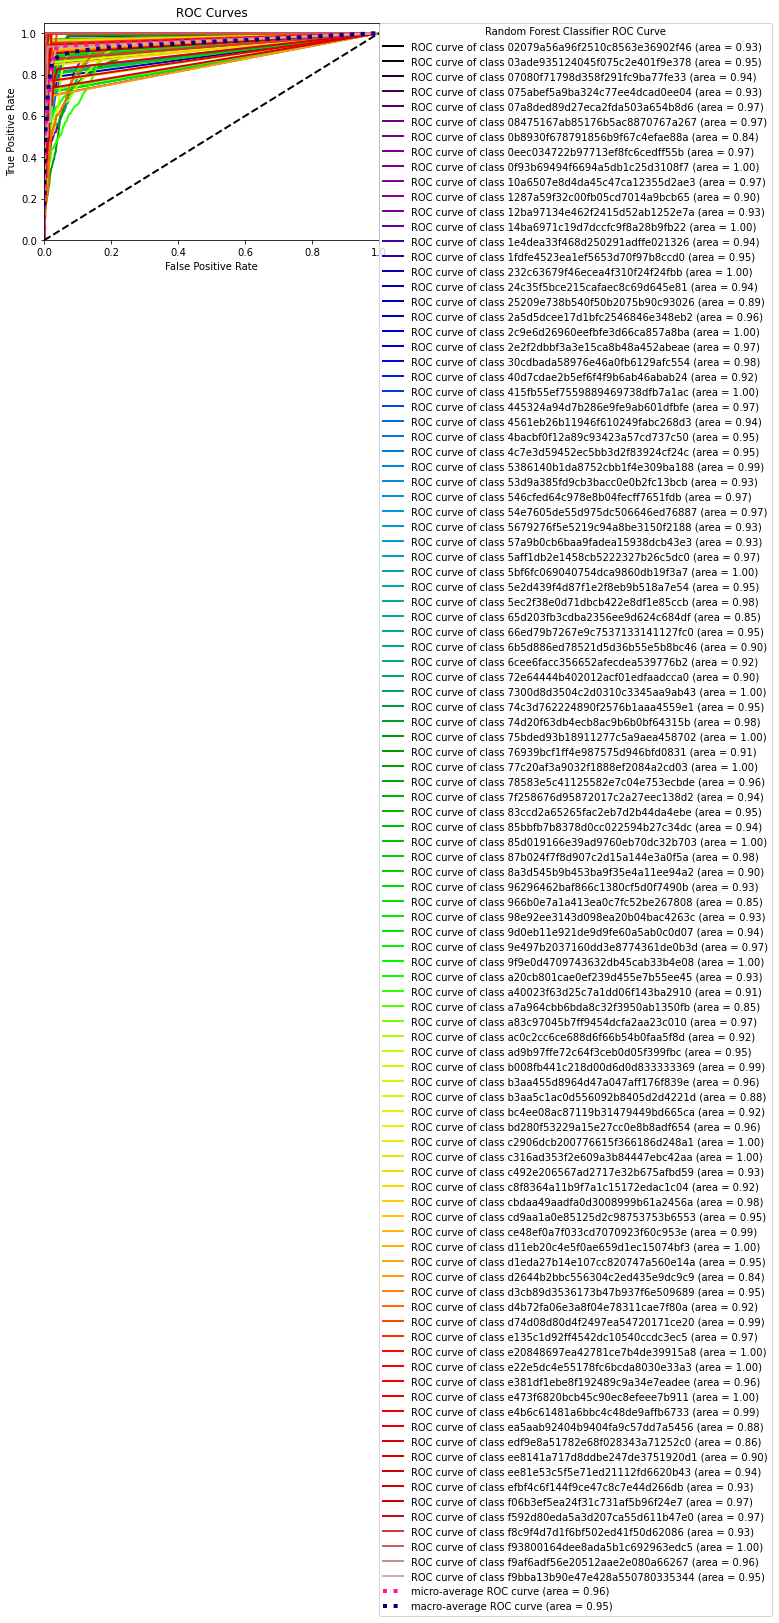

In [37]:
skplt.metrics.plot_roc(y_test, rf_pred)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.show()

**Gradient Boost Classifer ROC Curve**

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

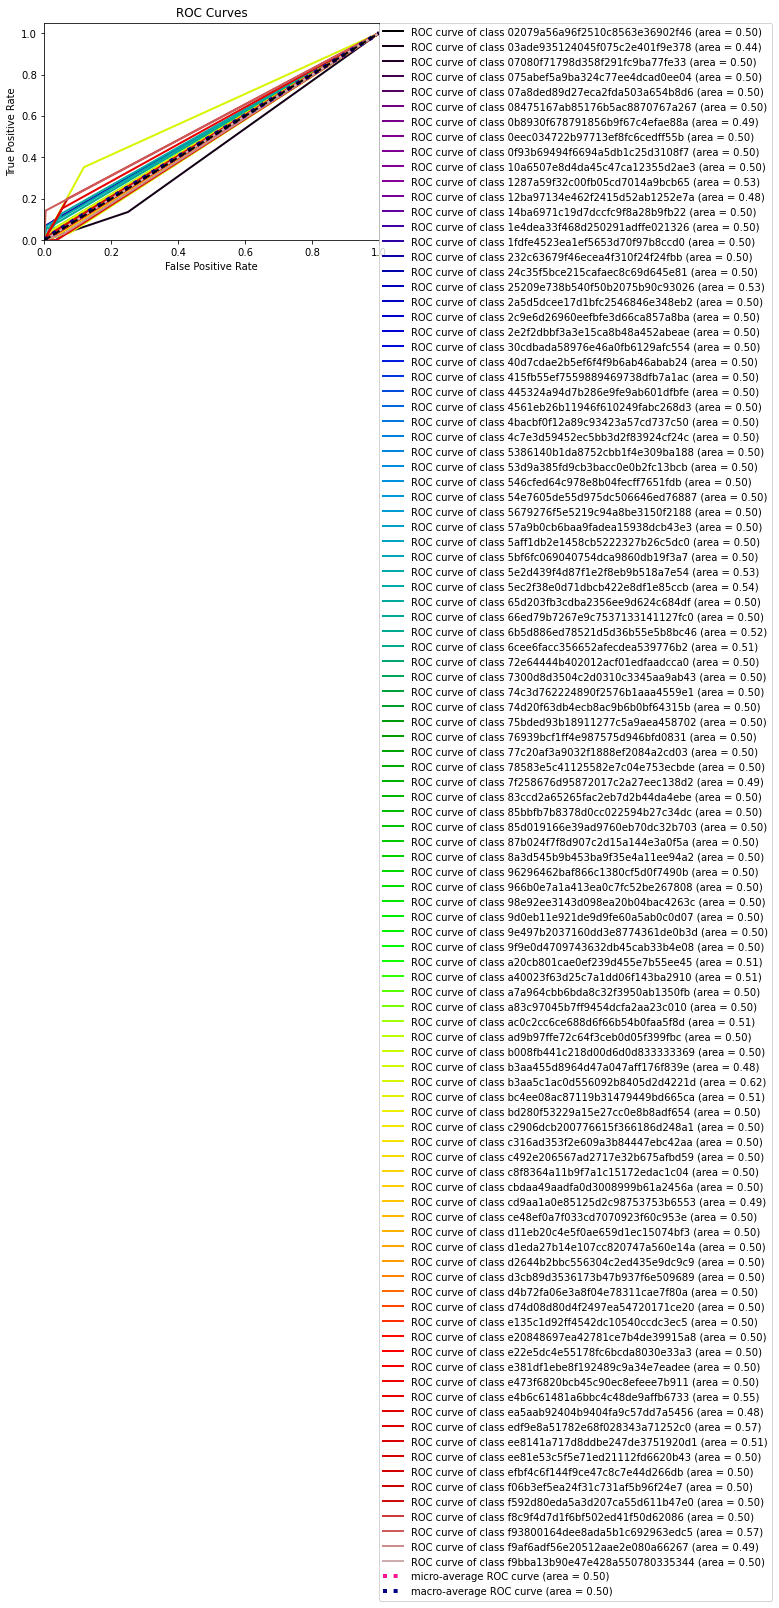

In [34]:
skplt.metrics.plot_roc(y_test, gb_pred)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.show()

**Histogram Gradient Boost Classifer ROC Curve**

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

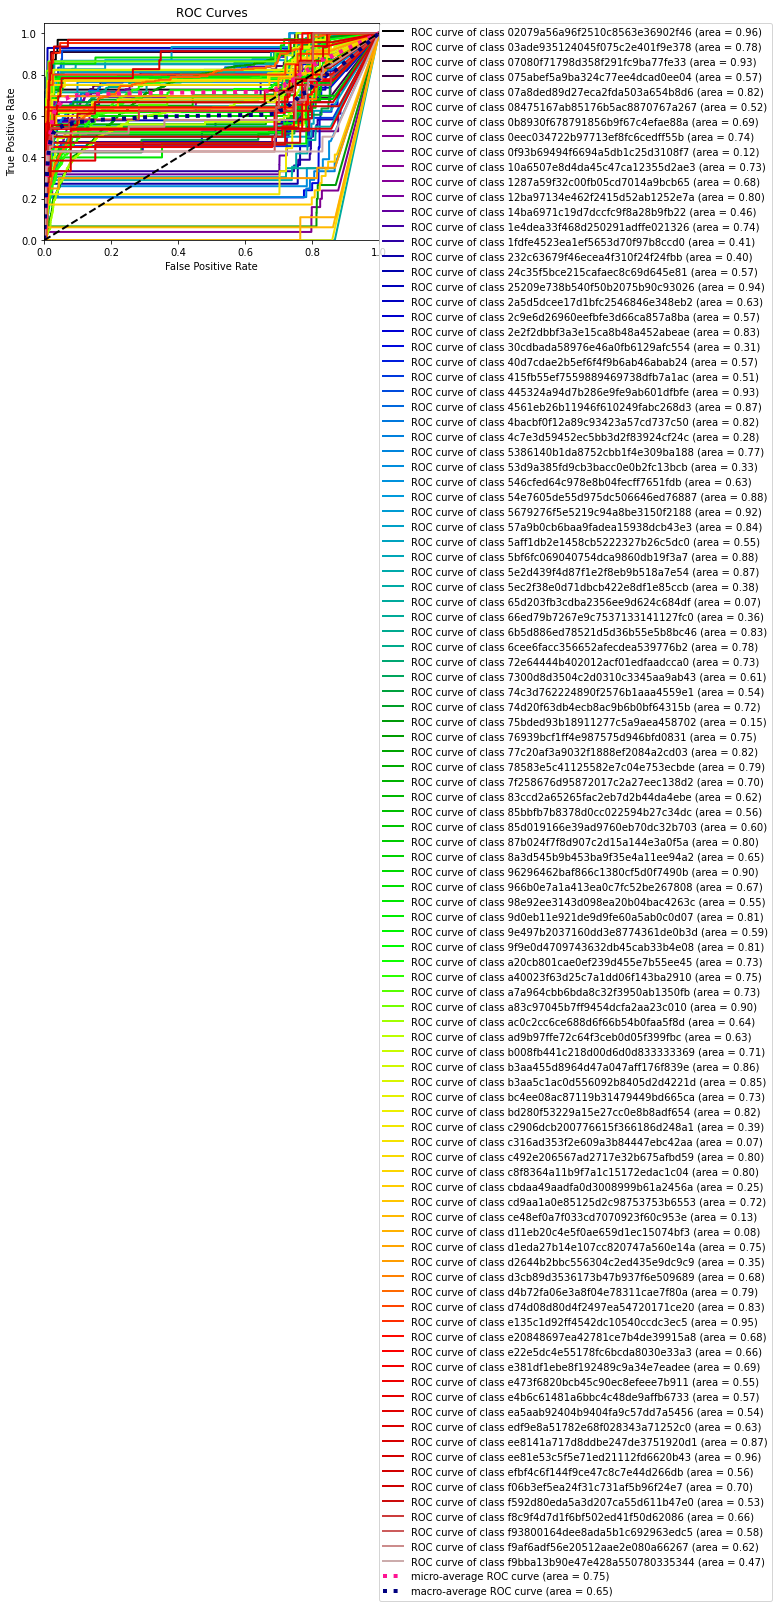

In [33]:
skplt.metrics.plot_roc(y_test, hgb_pred)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Classification on Dataset 2

In [41]:
X_train, X_test, y_train, y_test = train_test_split(CMUData.drop(columns = ['subject']), CMUData['subject'], test_size=0.2, random_state=14)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

16320
4080
16320
4080


##### Random Forest Classifier (Dataset 1)

In [49]:
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict_proba(X_test)

RandomForestClassifier()

In [50]:
rf_output = pd.DataFrame(rf_model.predict(X_test), index = X_test.index, columns = ['pred_user'])
rf_output = rf_output.merge(y_test, left_index = True, right_index = True)
rf_output.head()
print('Accuracy Score: ',rf_model.score(X_test, y_test))

,pred_user,subject
9495,s029,s029
18254,s052,s052
6908,s022,s022
3230,s012,s012
7749,s025,s025


Accuracy Score:  0.9053921568627451


##### Gradient Boost Classifier (Dataset 1)

In [51]:
gb_model.fit(X_train, y_train) 
gb_pred = gb_model.predict_proba(X_test)

GradientBoostingClassifier()

In [52]:
gb_output = pd.DataFrame(gb_model.predict(X_test), index = X_test.index, columns = ['pred_user'])
gb_output = gb_output.merge(y_test, left_index = True, right_index = True)
gb_output.head()
print('Accuracy Score: ',gb_model.score(X_test, y_test))

,pred_user,subject
9495,s029,s029
18254,s052,s052
6908,s022,s022
3230,s012,s012
7749,s025,s025


Accuracy Score:  0.8877450980392156


##### Histogram Gradient Boosting Classifier (Dataset 1)

In [53]:
hgb_model.fit(X_train, y_train) 
hgb_pred = hgb_model.predict_proba(X_test)

HistGradientBoostingClassifier()

In [54]:
hgb_output = pd.DataFrame(hgb_model.predict(X_test), index = X_test.index, columns = ['pred_user'])
hgb_output = hgb_output.merge(y_test, left_index = True, right_index = True)
hgb_output.head()
print('Accuracy Score: ',hgb_model.score(X_test, y_test))

,pred_user,subject
9495,s029,s029
18254,s052,s052
6908,s022,s022
3230,s012,s012
7749,s025,s025


Accuracy Score:  0.9142156862745098


##### ROC Curves of 3 Classifiers for Dataset 1:

**Random Forest Classifer ROC Curve**

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

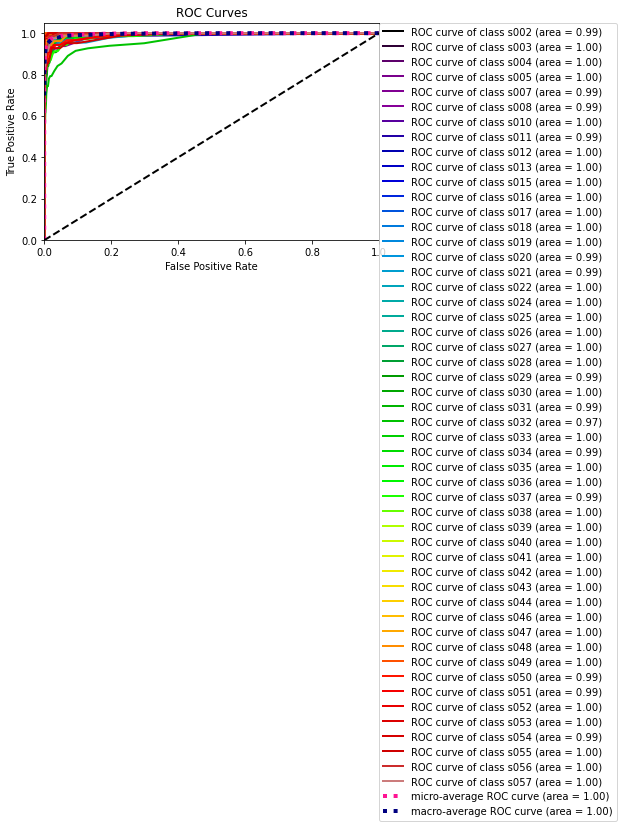

In [55]:
skplt.metrics.plot_roc(y_test, rf_pred)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.show()

**Gradient Boost Classifer ROC Curve**

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

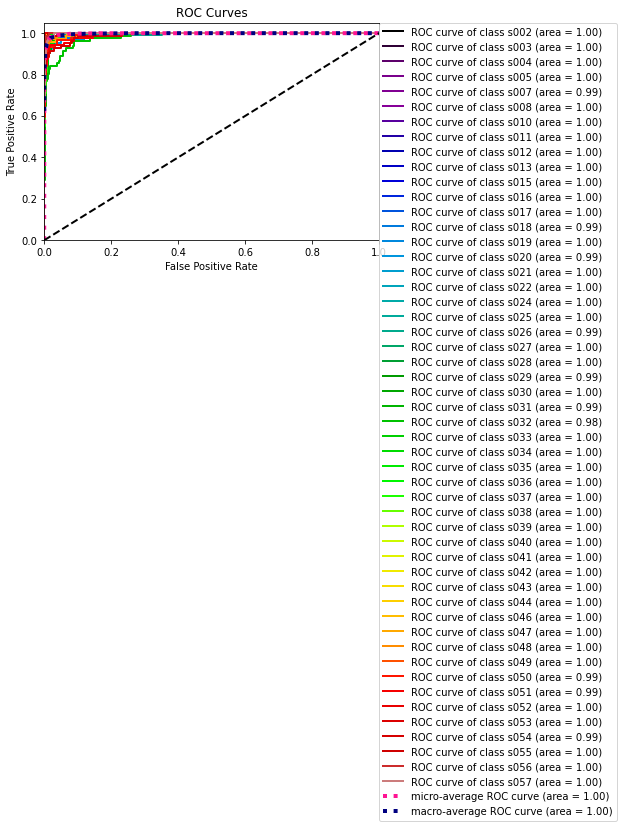

In [56]:
skplt.metrics.plot_roc(y_test, gb_pred)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.show()

**Histogram Gradient Boost Classifer ROC Curve**

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

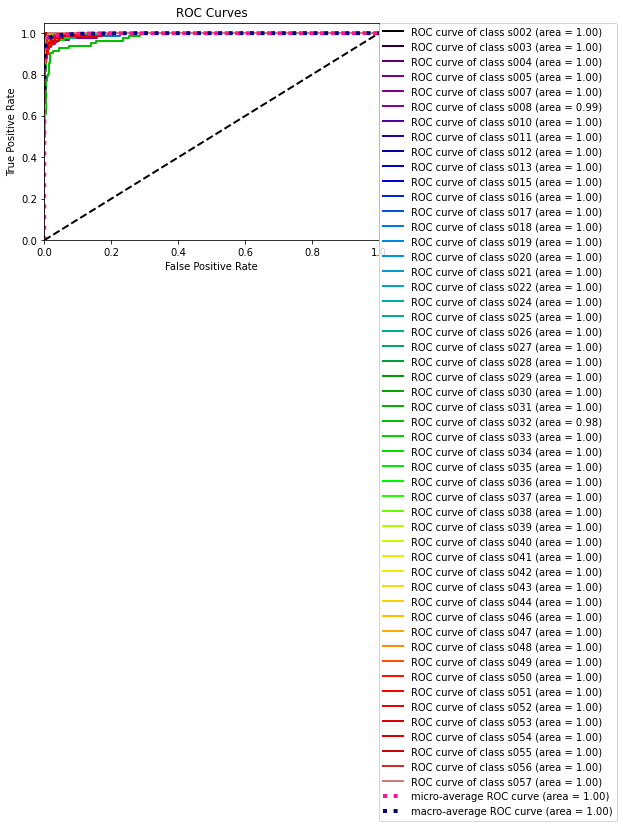

In [57]:
skplt.metrics.plot_roc(y_test, hgb_pred)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.show()

### Analysis of Initial Findings

By comparing the classifier Against Both the data sets it can be observed that

For Dataset 1:
**Random Forest Classifer** had highest accuracy score of **0.5583262890955198**

For Dataset 2:
**Histogram Gradient Boosting Classifier** had highest accuracy score of **0.9142156862745098**

Therefore, for futher analysis we would like to use Dataset 2 which is obtained from CMU with HistGradientBoostingClassfier()

In [58]:
pip install utils

Note: you may need to restart the kernel to use updated packages.


In [59]:
import utils
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,roc_curve,ConfusionMatrixDisplay

### Data Transformation of CMU Data (Dataset 2)

In [60]:
CMUData.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.15,0.40,0.25,0.11,0.17,0.06,0.12,...,0.13,0.15,0.01,0.09,0.35,0.26,0.13,0.35,0.22,0.07
1,s002,1,2,0.11,0.35,0.23,0.07,0.13,0.06,0.09,...,0.14,0.26,0.11,0.11,0.26,0.15,0.08,0.28,0.19,0.07
2,s002,1,3,0.13,0.21,0.07,0.07,0.13,0.06,0.08,...,0.16,0.23,0.07,0.12,0.27,0.15,0.11,0.28,0.18,0.09
3,s002,1,4,0.13,0.25,0.12,0.11,0.25,0.14,0.10,...,0.15,0.16,0.02,0.09,0.23,0.15,0.08,0.32,0.24,0.08
4,s002,1,5,0.12,0.23,0.11,0.09,0.17,0.08,0.09,...,0.13,0.16,0.03,0.09,0.25,0.16,0.09,0.25,0.16,0.08


Here we are planning to reduce separate the data based on the action performed i.e., Key press, Key hold and Key release

In [61]:
subject = CMUData['subject']
subject

0        s002
1        s002
2        s002
3        s002
4        s002
         ... 
20395    s057
20396    s057
20397    s057
20398    s057
20399    s057
Name: subject, Length: 20400, dtype: object

Dropping irrelavant data

In [62]:
dataset={}
dataset['final'] = CMUData.drop(columns=['subject', 'sessionIndex', 'rep'])

Feature wise grouping of data

In [63]:
dataset['KeyHold']     = CMUData[[col for col in CMUData.columns if col.startswith('H')]]
dataset['KeyPress']    = CMUData[[col for col in CMUData.columns if col.startswith('DD')]]
dataset['KeyRelease']    = CMUData[[col for col in CMUData.columns if col.startswith('UD')]]

Adding PCA to calculate additional accuracy

In [64]:
dataset['pca5']  = pd.DataFrame(PCA(n_components=5).fit_transform(dataset['final']))
dataset['pca10'] = pd.DataFrame(PCA(n_components=10).fit_transform(dataset['final']))

In [65]:
dataset['KeyHold']

,H.period,H.t,H.i,H.e,H.five,H.Shift.r,H.o,H.a,H.n,H.l,H.Return
0,0.15,0.11,0.12,0.14,0.11,0.11,0.10,0.13,0.09,0.13,0.07
1,0.11,0.07,0.09,0.08,0.07,0.16,0.11,0.14,0.11,0.08,0.07
2,0.13,0.07,0.08,0.08,0.09,0.15,0.14,0.16,0.12,0.11,0.09
3,0.13,0.11,0.10,0.09,0.09,0.15,0.10,0.15,0.09,0.08,0.08
4,0.12,0.09,0.09,0.08,0.07,0.12,0.04,0.13,0.09,0.09,0.08
...,...,...,...,...,...,...,...,...,...,...,...
20395,0.09,0.11,0.09,0.13,0.10,0.09,0.09,0.12,0.08,0.10,0.10
20396,0.07,0.09,0.09,0.13,0.10,0.09,0.08,0.10,0.10,0.14,0.12
20397,0.09,0.10,0.07,0.09,0.07,0.07,0.06,0.09,0.07,0.10,0.09
20398,0.09,0.09,0.10,0.10,0.08,0.07,0.07,0.09,0.06,0.10,0.09


In [66]:
dataset['KeyPress']

,DD.period.t,DD.t.i,DD.i.e,DD.e.five,DD.five.Shift.r,DD.Shift.r.o,DD.o.a,DD.a.n,DD.n.l,DD.l.Return
0,0.40,0.17,0.22,1.19,1.61,0.76,0.21,0.15,0.35,0.35
1,0.35,0.13,0.14,1.20,0.78,0.79,0.17,0.26,0.26,0.28
2,0.21,0.13,0.15,1.04,0.62,0.72,0.29,0.23,0.27,0.28
3,0.25,0.25,0.20,1.06,1.26,0.76,0.15,0.16,0.23,0.32
4,0.23,0.17,0.16,0.86,0.90,0.76,0.20,0.16,0.25,0.25
...,...,...,...,...,...,...,...,...,...,...
20395,0.07,0.13,0.08,0.08,0.24,0.21,0.21,0.14,0.13,0.21
20396,0.06,0.11,0.06,0.09,0.24,0.12,0.10,0.05,0.09,0.22
20397,0.12,0.11,0.05,0.20,0.22,0.17,0.11,0.12,0.13,0.20
20398,0.13,0.10,0.09,0.06,0.29,0.16,0.11,0.08,0.07,0.19


In [67]:
dataset['KeyRelease']

,UD.period.t,UD.t.i,UD.i.e,UD.e.five,UD.five.Shift.r,UD.Shift.r.o,UD.o.a,UD.a.n,UD.n.l,UD.l.Return
0,0.25,0.06,0.10,1.05,1.49,0.65,0.11,0.01,0.26,0.22
1,0.23,0.06,0.04,1.11,0.71,0.63,0.06,0.11,0.15,0.19
2,0.07,0.06,0.07,0.96,0.53,0.57,0.16,0.07,0.15,0.18
3,0.12,0.14,0.10,0.97,1.17,0.61,0.06,0.02,0.15,0.24
4,0.11,0.08,0.07,0.78,0.82,0.64,0.15,0.03,0.16,0.16
...,...,...,...,...,...,...,...,...,...,...
20395,-0.02,0.02,-0.02,-0.05,0.14,0.13,0.11,0.02,0.05,0.10
20396,-0.00,0.02,-0.03,-0.04,0.15,0.03,0.02,-0.05,-0.02,0.08
20397,0.03,0.01,-0.03,0.11,0.15,0.10,0.05,0.03,0.06,0.10
20398,0.04,0.01,-0.01,-0.04,0.21,0.09,0.04,-0.01,0.01,0.09


In [68]:
y=subject.values

#### Sample Scatterplot to understand the data for 10 sample classes

In [69]:
subjects = np.unique(y)[:10]
mask = [y0 in subjects for y0 in y]

X_tsne = dataset['final'].values[mask]
y_subset = y[mask]

tsne = TSNE(n_components=2, learning_rate=1000, perplexity=10)
X_embedded = tsne.fit_transform(X_tsne)

C:\Programs\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


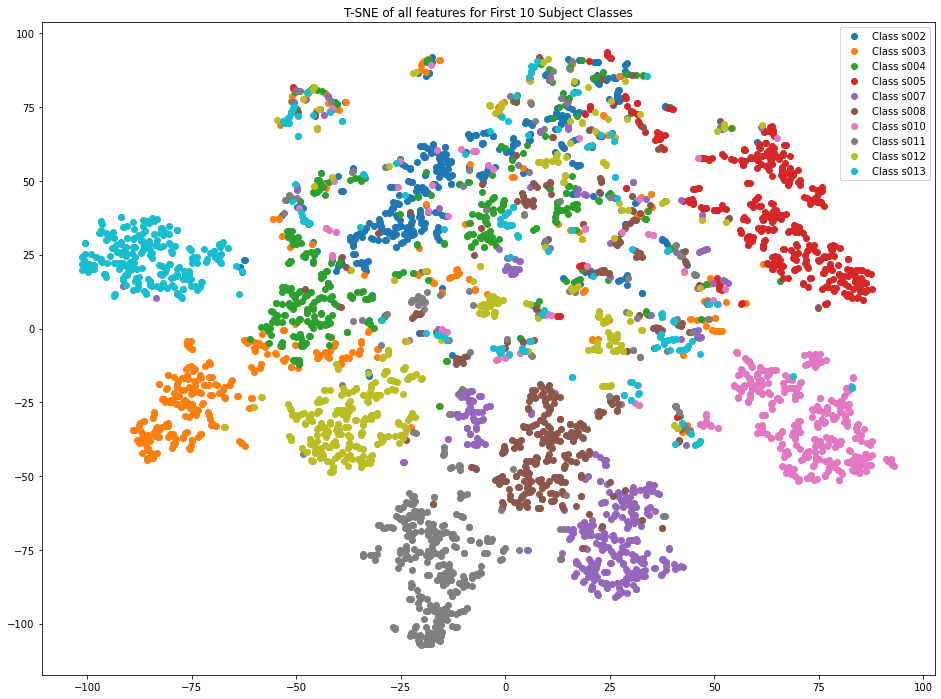

In [70]:
plt.figure(figsize=(16, 12))
for y0 in subjects:
    label = 'Class {}'.format(y0)
    plt.plot(X_embedded[y_subset == y0][:, 0], 
             X_embedded[y_subset == y0][:, 1], 
             'o', label=label)

plt.title('T-SNE of all features for First 10 Subject Classes')
plt.legend();

#### Feature wise classification

In [71]:
hgb_model=HistGradientBoostingClassifier()
for key in dataset:
    scores = cross_val_score(hgb_model, dataset[key], y, cv=5)
    print("Accuracy for {:5s} : {:0.2f} (+/- {:0.2f})".format(
        key, scores.mean(), scores.std() * 2))

Accuracy for final : 0.88 (+/- 0.15)
Accuracy for KeyHold : 0.67 (+/- 0.12)
Accuracy for KeyPress : 0.68 (+/- 0.17)
Accuracy for KeyRelease : 0.73 (+/- 0.18)
Accuracy for pca5  : 0.35 (+/- 0.15)
Accuracy for pca10 : 0.62 (+/- 0.20)


In [72]:
X=dataset['final']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
hgb_model.fit(X_train, y_train) 
hgb_pred = hgb_model.predict_proba(X_test)

HistGradientBoostingClassifier()

In [75]:
print('Accuracy Score',hgb_model.score(X_test, y_test))

Accuracy Score 0.942156862745098


After the transformation performed on data we were able to improve the accuracy score of the data from **0.9142156862745098** to **0.942156862745098** which is an improvement in accuracy of approximately **2.8%**

(We also observed the score reaching approximately 0.95 during some of our test runs)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

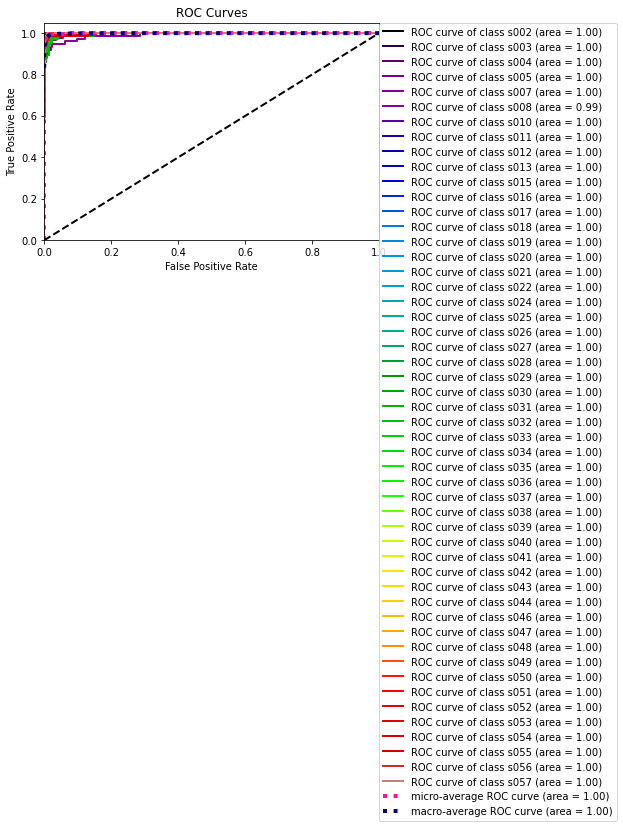

In [77]:
skplt.metrics.plot_roc(y_test, hgb_pred)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.show()